<a href="https://colab.research.google.com/github/henry-trinh/CodePath-SE101-Lectures/blob/main/Lorenz96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lorenz 96 Model

As we have seen in [the video on global circulation](https://www.youtube.com/watch?v=Ye45DGkqUkE), motion in the atmosphere is driven by heating from the Sun, the rotation of the Earth, and the Coriolis pseudoforce, which bends winds to the right in the northern hemisphere and to the left in the southern hemisphere. A realistic model would include variations in properties such as wind velocity, temperature, pressure, humidity, insolation, etc. with latitude, longitude, altitude, and time of day and year. However, the drastically simplified Lorenz 96 model captures important features of atmospheric dynamics in a form we can start to understand.

The Lorenz 96 model is a one-dimensional atmospheric toy model with $K$ variables, $X_k$, that represent a quantity such as temperature as a function of [longitude](https://oceanservice.noaa.gov/facts/longitude.html). We will take $K=36$, so that each $X_k$ represents some property over a band of 10° of longitude. *The model takes no account of latitude; we can perhaps think of it as applying to a band of latitudes near the Equator.* The variables $X_k$ are governed by the equations
\begin{equation}
  \frac{dX_k}{dt} = \underbrace{X_{k-1} (X_{k+1} - X_{k-2})}_{\text{advection}} \quad \underbrace{- X_k}_{\text{dissipation}} \quad \underbrace{+F}_{\text{forcing}}
\end{equation}
in which the **advection** terms describe the flux of quantity “X” from nearby bands of longitude into the $k$th band, $F$ represents the constant (average) forcing or source term that generates motion, and $-X_k$ represents the dissipation of organized motion into heat.

These equations may seem a bit arbitrary, but this model is widely used because it exhibits a lot of the same behavior found in real models used for numerical weather prediction and climate simulation. We can assign meaning to the terms in the equations that match up with terms in more complex models.

Because east meets west as we proceed around the globe, we use cyclic boundary conditions:
\begin{equation}
 X_{k+K} = X_k
\end{equation}

<center><img src="https://saeta.physics.hmc.edu/Lorenz96/longitude.png" width=" 500px"></center>

The image below shows how to view this 1D grid if $K=36$. Each $X_k$ is the value of $X$ within the $k^{\rm th}$ grid box (and rememember this 1D grid is actually on a sphere, so it wraps around).

<center><img src="https://saeta.physics.hmc.edu/Lorenz96/zones.png" style="width: 700px;"></center>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from numpy.random import default_rng
rng = default_rng()
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

<IPython.core.display.Javascript object>

In [ ]:
!wget https://saeta.physics.hmc.edu/Lorenz96/lorenz96.py

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--2023-04-17 18:41:01--  https://saeta.physics.hmc.edu/Lorenz96/lorenz96.py
Resolving saeta.physics.hmc.edu (saeta.physics.hmc.edu)... 134.173.33.32
Connecting to saeta.physics.hmc.edu (saeta.physics.hmc.edu)|134.173.33.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9650 (9.4K) [text/x-python]
Saving to: ‘lorenz96.py.1’

lorenz96.py.1       100%[===================>]   9.42K  --.-KB/s    in 0s      

2023-04-17 18:41:01 (151 MB/s) - ‘lorenz96.py.1’ saved [9650/9650]



## Uniform Solution

First, let us confirm that when we initialize every variable $X_k$ with the value $F$ that describes the forcing term, nothing ever changes.
\begin{equation}
  \frac{dX_k}{dt} = \underbrace{{X_{k-1} (X_{k+1} - X_{k-2})}}_{\text{advection}} \quad \underbrace{- X_k}_{\text{dissipation}} \quad \underbrace{+F}_{\text{forcing}}
\end{equation}

In the following code, the keyword parameter `nudge` sets the initial condition with all $X_k = F$.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

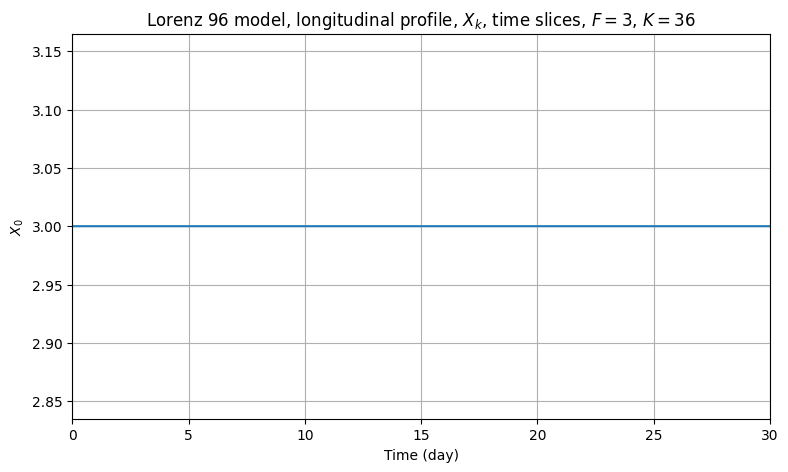

In [ ]:
from lorenz96 import Lorenz96
Lorenz96(ndays=30, forcing=3, nudge=False).plot_series()

## Nudging away from uniform

By default, `nudge` is true, which means that $X_{K/2}$ is deviated very slightly from the value of $F$, while all other $X_k$ values are initialized to $F$ as before. As you can see by running the code below, the value of $X_0$ remains at $F$ for a few days, but then departs in a serious way.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

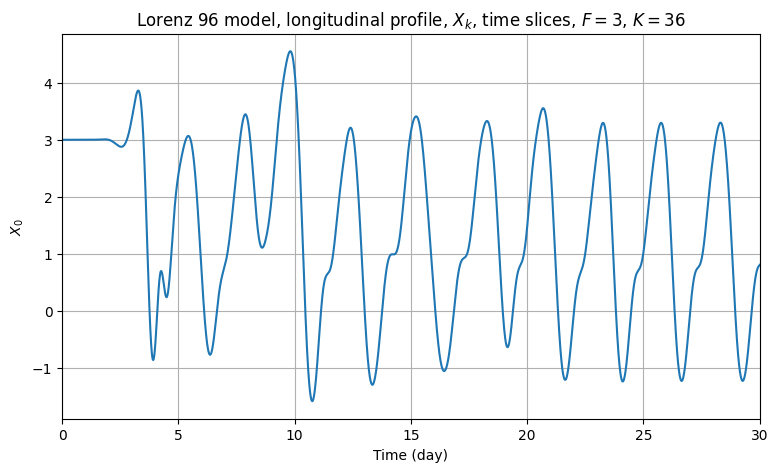

In [ ]:
Lorenz96(ndays=30, forcing=3, nudge=True).plot_series()

## Running several simulations in an ensemble

We can explore how sensitive the behavior of the simulation is by setting the parameter `ensemble_size` to a number greater than 1 (which is its default value). Each simulation perturbs the initial value of $X_2$ by a different tiny amount. By setting `extra_plots=True` in the call to `plot_series`, several intervals of either a week or a day's duration are shown in addition to the plot lasting the full duration set by `ndays`. How would you characterize the behavior of the system under this level of forcing ($F = 3$)?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

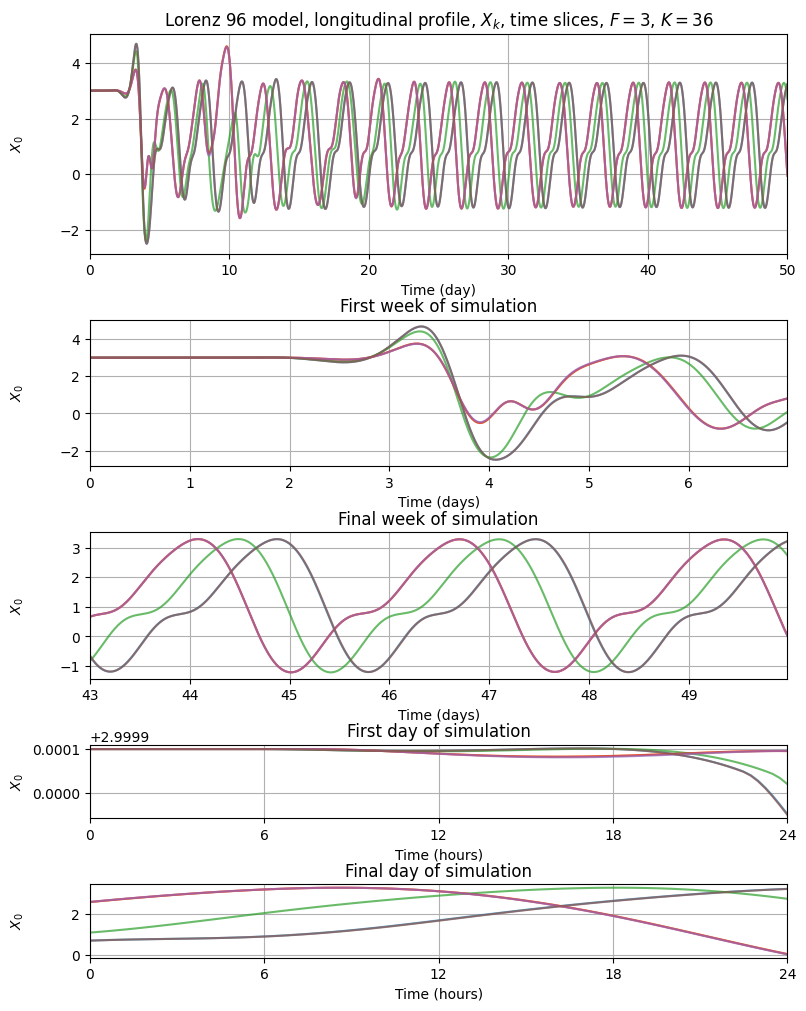

In [ ]:
l = Lorenz96(ndays=50, forcing=3, ensemble_size=6)
l.plot_series(extra_plots=True)

### How different are the solutions?

Each of the solution begins from a slightly different initial disturbance to the value of $X_0$. How similar or how divergent are the trajectories? Would you say that the system is behaving chaotically? Why or why not?

## A More holistic look at the simulation

For a more global view of the simulation, we can show each $X_k$ as a function of time in a two-dimensional heat map using a different plot call. Since we saved the results of the simulation in the variable `l`, we just call a different member function to generate this kind of plot. How would you characterize the behavior of the model with $F=3$?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

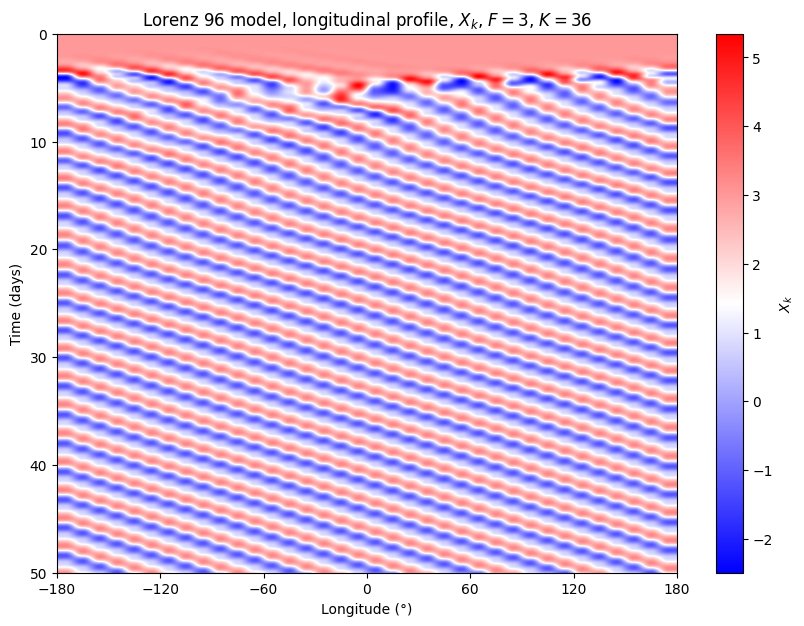

In [ ]:
l.plot_all()

When viewed in this way, does the output of the simulation look chaotic?

## Snapshots

We have one additional way to plot the output. It shows snapshots of the values of $X_k$ at different points in time.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

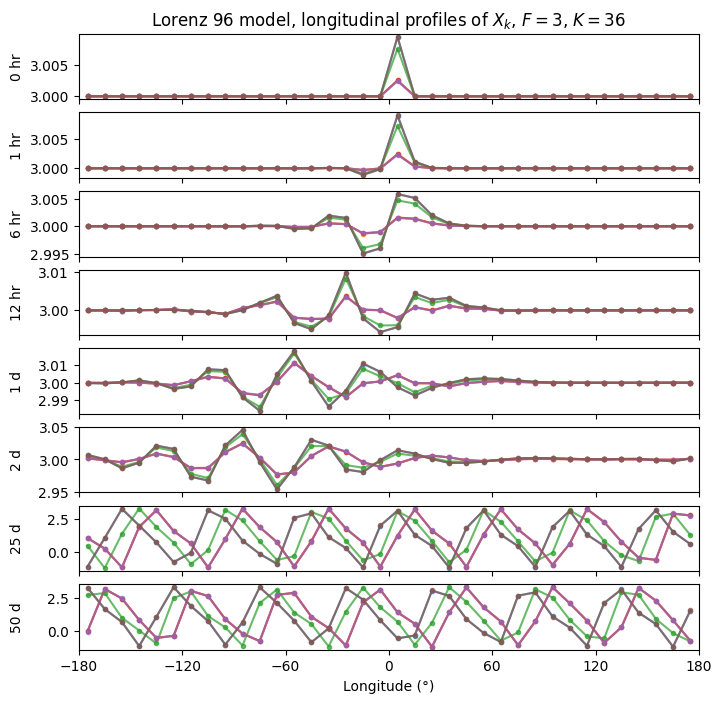

In [ ]:
plt.close('all') # eventually, matplotlib complains if you have too many plots open
l.plot_snaps()

## Options

Both the simulation and the plots have options that you can use to alter their default behavior.

### Simulation options

When you call Lorenz96() to create a simulation, a number of arguments are given default values and several others can be set using keyword arguments:

    def __init__(self, zones=36, forcing=8, ndays=30, **kwargs):
        """
        Optional inputs:
            ensemble_size (1): how many distinct initial conditions/simulations to run
            nudge (True):      perturb one initial value by a small random amount
            kick (0.01):       maximum nudge to give X_0
            x0 (forcing):      the initial value of each X_k

        For each initial condition, simulate for ndays using solve_ivp and producing
        dense output.
        """
`solve_ivp` is a function in `scipy.integrate`. “Dense output” means that an interpolating function is generated to allow you to compute the value of the variables at any time between 0 and ndays.

The value of `forcing` defaults to 8, but you can use any value or a list of values if you want to compare the behavior for different levels of forcing. If you pass a list, consider passing a value for `x0` (or a list of values of equal length as the forcing list).

### Output

A call to Lorenz96() generates an simulation object, which you can store in a variable to use for various plotting functions. However, you can also simply call one of those plotting functions directly using a call such as
`Lorenz96().plot_all()`.

### Plotting options

There are three distinct plotting methods in a `Lorenz96()` object:

`plot_all()` generates a 2-d heat map showing $X_k(t)$, with $t$ along the vertical and $k$ along the horizontal. If multiple initial conditions were provided, only the first one is used to make the heat map.

`plot_series()` generates one or more time series for a particular $X_k$ or a set of $X_k$s. Optional keyword arguments are

+ `extra_plots=True` generates additional plots zoomed-in to the first and last weeks and the first and last days of the simulation.
+ `avg=True` generates the average over all zones, $\overline{X}_k$
+ `dt=x`, where x is a number, allows you to set the time interval used for plotting; it defaults to 15 minutes
+ `bands=True` displays the average and standard deviation of the `ensemble_size` runs
+ `k=[<set of k values]` selects the zones to plot (default is $k = 0$)

`plot_snaps()` generates snapshots of $X_k$ at several distinct instants of time, showing how the spatial pattern of $X_k$ looks as the simulation evolves. Optional keyword arguments are

+ `bands=True` displays the average and standard deviation of the `ensemble_size` runs
+ `all=True` does something! defaults to False
+ `t=[list of times]` sets the times for the snap shots, in days. The default is [0, 1 hr, 6 hr, 12 hr, 24 hr, 2, 3, 20, 50]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

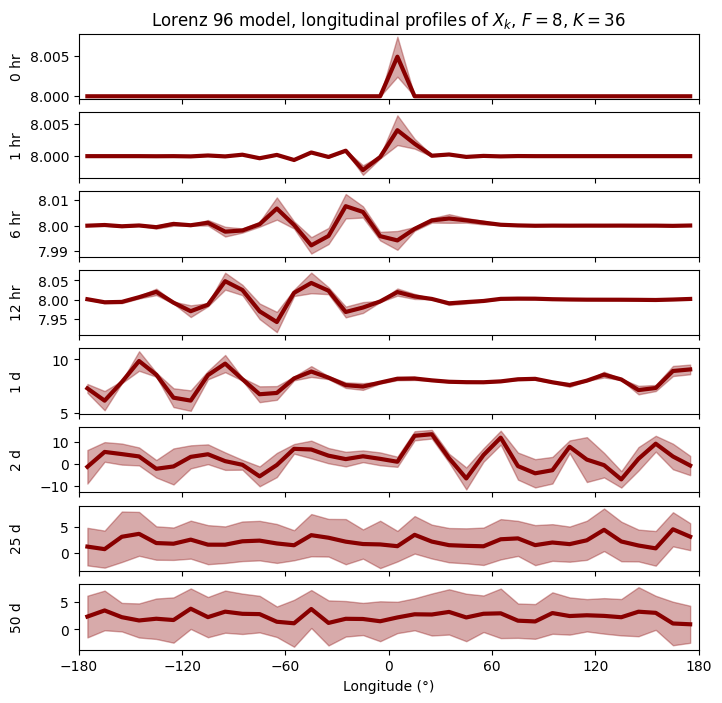

In [ ]:
Lorenz96(ndays=100, ensemble_size=20, forcing=8).plot_snaps(bands=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

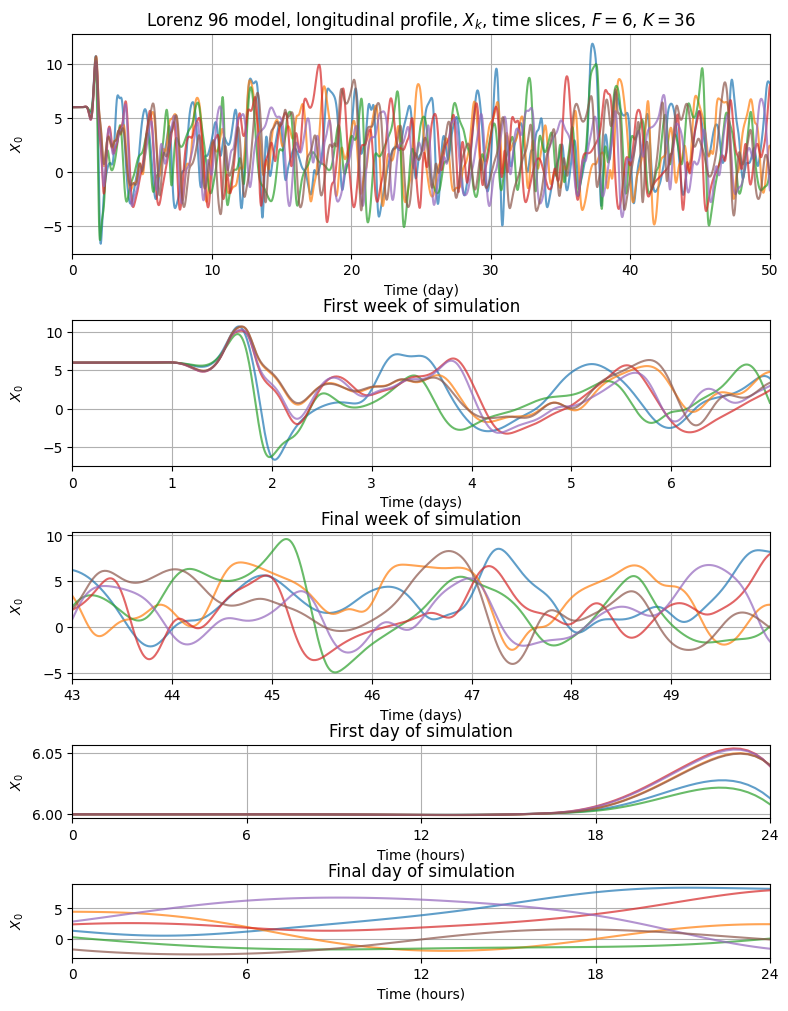

In [ ]:
l = Lorenz96(ndays=50, forcing=6, ensemble_size=6)
l.plot_series(extra_plots=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

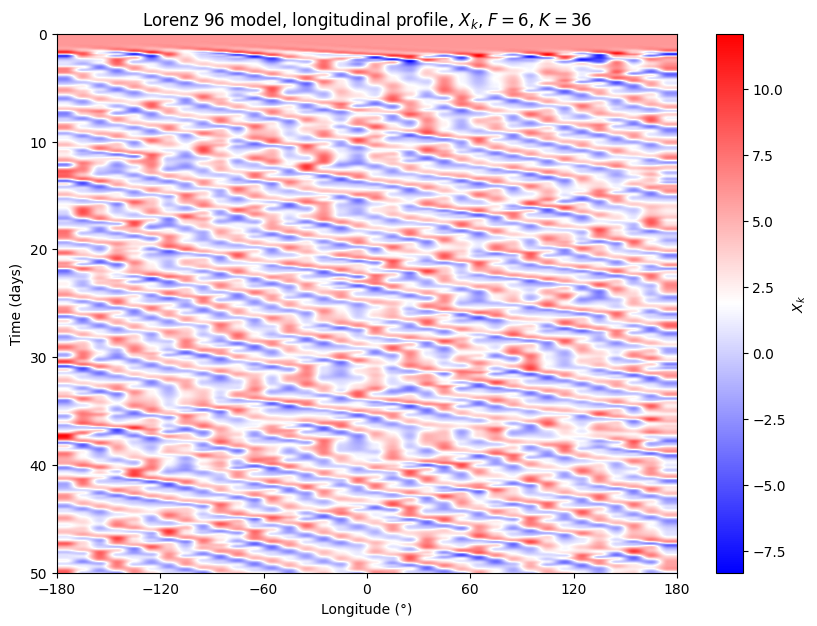

In [ ]:
l.plot_all()

In [ ]:
Lorenz96(ndays=50, forcing=12, ensemble_size=6).plot_series(extra_plots=True)

## Try varying the simulation length

Keep the number of days manageable (say, less than 500 or so). Feel free to edit the parameters in the plotting call below to visualize the output as you wish. Does anything interesting occur for longer runs? Does it depend on the forcing?

In [ ]:
l = Lorenz96(ndays=500, forcing=5, ensemble_size=10)
l.plot_series(extra_plots=True, bands=True)

## Looking at the global average

You can plot the global average of the values of $X_k$ using the keyword avg=True:

In [ ]:
l = Lorenz96(ndays=50, forcing=8, ensemble_size=10)
l.plot_series(extra_plots=True, avg=True)

## Changing the number of zones

Try changing the number of longitudinal zones from 36. Does

In [ ]:
Lorenz96(zones=60, ndays=50, ensemble_size=1).plot_all()

In [ ]:
Lorenz96(zones=36, ndays=50, ensemble_size=1).plot_all()

In [ ]:
l = Lorenz96(ndays=50, forcing=[1, 2, 4, 8, 10], x0=2)
l.plot_series(extra_plots=True, avg=True)

In [ ]:
l.plot_snaps(all=True)